# Исследование продаж компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Цель исследования:**

- выявить закономерности, определяющие успешность игры
- определить потенциально популярный продукт

**Ход исследования:**

Исходные данные прочитаем из файла `/datasets/games.csv`. Для проведения исследования необходимо изучить и подготовить данные. Перед началом исследования проведем предобаботку данных: проверим данные на шумы, пропуски, выбросы и устраним все выявленные проблемы. Определим актуальный период для проведения исследования, произведем необходимые расчеты, полученные показатели помогут провести полноценный исследовательский анализ данных. Для визуализации и интерперетации данных будем использовать сводные таблицы, гистограммы, диаграммы размаха, рассеяния, а также столбчатые и круговые диаграммы. Далее составим портрет пользвателя каждого региона (NA, EU, JP). На заключительном этапе сформулируем и проверим гипотезы статистическими тестами и зафиксируем полученные результаты в общем выводе исследования.

**Основные этапы исследования:**

1. Знакомство с данными и изучение общей информации.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
4. Статистический анализ, проверка гипотез.
5. Составление общего вывода.

## Изучение общей информации из файла с данными.

Ознакомимся с информацией о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Для этого прочитаем данные из файла `/datasets/games.csv` и выведем первые строки.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Прочитаем исходные данные и выведем первые строки
games = pd.read_csv('http://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Выведем основную информацию для датафрема `games`.

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наблюдаем, что в таблице всего 11 столбцов и 16 715 строк. На этапе предобработки данных приведем названия столбцов к нижнему регистру в соответсвии с хорошим стилем. 

В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` имеются пропущенные значения, рассмотрим возможные причины пропусков и по возможности обработаем их. В столбце с годом выпуска игр приведем вещественные значения к целочисленному типу, а данные с оценками пользователей - к числовому типу данных. 

Для столбцов с числовым типом данных посмотрим статистические характеристики, которые дают представление  о распределении значений.

In [3]:
# Выведем статистические данные по столбцам с округлением значений до 2-х знаков после запятой
pd.options.display.float_format = '{:.2f}'.format
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Наблюдаем, что данные предоставлены по играм с датой выпуска от 1980 г. по 2016 год. Максимальное количество проданных игр в Северной Америке, значительно меньше в Европе, и наименьшие показатели в Японии и других странах. 

Для более детального ознакомления с данными построим общую гистограмму для всех числовых столбцов таблицы.

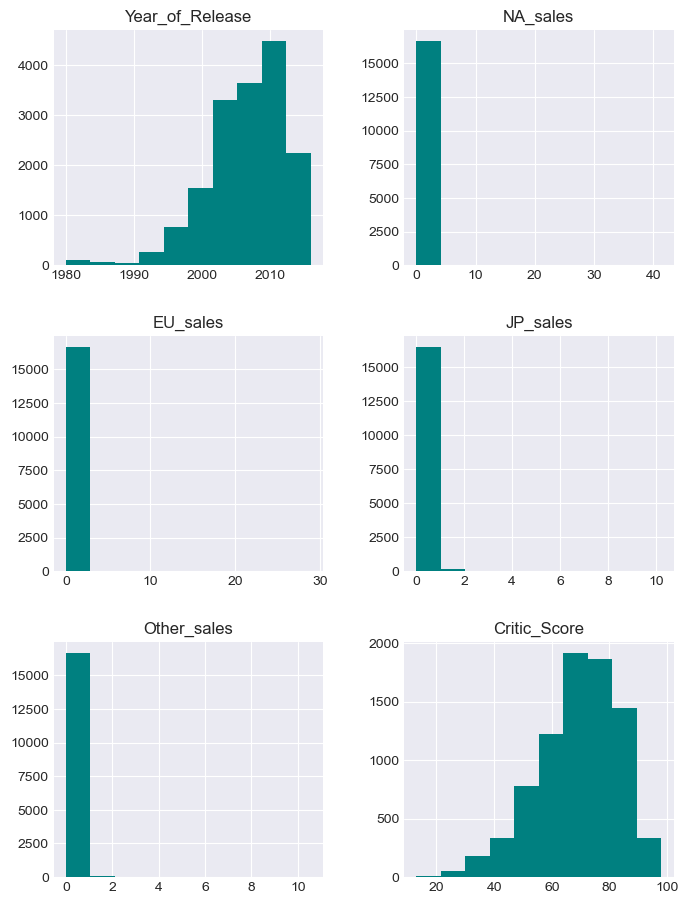

In [4]:
# Строим гистограммы по всем числовым столбцам
matplotlib.style.use('seaborn-darkgrid')
games.hist(color='teal', figsize=(8, 11))
plt.show()

На гистограмме по распределению года выпуска игр видим, что после 2000 года игры создавались знаительно активнее, чем в предыдущие периоды. Наибольшее количество игр было создано в период с 2010 по 2012 годы.

Исходя из распределения продаж в разных странах, в основном в Северной Америке до 4-х миллионов проданных копий, есть незначительное количество игр, продажи которых превышают этот показатель. В Европе в основном продажи составили до 3-х миллионов, а в Японии, также как и в других странах - примерно до 1-го миллиона игр.

В столбце `Critic_Score` с оценками критиков значения имеют нормальное распределение, основная часть оценок приходится на среднее значение (примерно 69 баллов) и близкие к нему.

**Вывод:**

Таким образом, изучили общую информацию по полученным данным до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Ознакомились со статистическими показателями для числовых столбцов, а также с использованием гистограмм посмотрели на их распределение. В ходе ознакомления с данными были обнаружены пропущенные значения, некорректный тип данных и наименования столбцов. Обработкой данного ряда обнаруженных проблем займемся на следующем этапе предобработки данных.

## Предобработка данных.

Для дальнейшей работы приведем наименования столбцов к нижему регистру в соответсвии с хорошим стилем и проверим изменения.

In [5]:
# Приведение названий столбцов к нижнему регистру и проверка изменений
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Перед обработкой отсутствующих значений, проверим, нет ли дубликтов в датафрейме.

In [6]:
print(f'Количество строк дубликатов: {games.duplicated().sum()}.')

Количество строк дубликатов: 0.


Посмотрим на общее количество пропущенных значений в убывающем порядке.

In [7]:
# Вывод общего количества пропусков
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Наибольшее количество пропусков в столбцах с оценками критиков, рейтингом от организации ESRB и годом выпуска игры. В остальных колонках незначительное количество пропусков, либо их вовсе нет. 

Для более корректной обработки, определим процент пропущенных значений по каждому показателю.

In [8]:
# Выведем % количества пропусков от общего числа показателей в каждом столбце с окрулением до 2-х знаков после запятой
pd.DataFrame(round(games.isna().mean()*100, 2)).sort_values(by=0).style.format('{:.2f}').background_gradient('GnBu')

,0
platform,0.00
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
name,0.01
genre,0.01
year_of_release,1.61
user_score,40.09
rating,40.48


Видим, что в трех столбцах - `name`, `genre` и `year_of_release` минимальный процент пропущенных значений, поэтому можем избавиться от данных с малочисленным количеством пропусков. Пропуски в данных столбцах, вероятно, связаны с технологическими факторами, такими как, технические проблемы при выгрузке данных. В то же время жанр игры мог быть не определен изначально, а год выпуска неизвестен. Кроме того, исследовательский анализ будет проводиться за актуальный период, т.е. мы в любом случае будем сокращать датафрейм по году выпуска игр. Соответственно, в данном случае удаление данных не исказит результаты исследования.

In [9]:
# Удалим данные с незначительным количеством пропусков и обновим индексы
games = games.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

В оставшихся столбцах с оценками критиков, пользователей и рейтингом процент пропусков высокий, избавляться от такого количества данных мы не можем и логичной замены данным значениям нет. Пропуски в данных столбцах могли быть вызваны как технологическими факторами, так и просто отсутствием соответсвующих оценок и рейтинга от организации ESRB, основанной лишь в 1994 году. Поэтому воспользуемся маркером для заполнения пропусков в этих столбцах, а в дальнейшем на этапе анализа при необходимости будем отфильтровывать такие заглушки.

In [10]:
# Произведем замену пропусков маркером
for col in ['user_score', 'critic_score']:
    games[col].fillna(-777, inplace=True)
games['rating'].fillna('unknown', inplace=True)

Пропущенные значения обработаны, переходим к изменению некорректного типа данных. Преобразуем данные в `year_of_release` к целочисленному типу и выведем уникальные значения.

In [11]:
# Приведение значений года выпуска игр к типу числа
games['year_of_release'] = games['year_of_release'].astype('int')
# Вывод уникальных значений 
games['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Проверим наличие неявных дубликатов в категориальных переменных. Ознакомимся с уникальными значениями платформ.

In [12]:
# Уникальные платформы
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

На первый взгляд некоторые названия похожи на дубликаты, к примеру Wii и WiiU, DC и DS. Но изучив перечень всех игровых платформ, пришли к выводу, что это разные платформы, соответственно дубликатов в данном столбце нет.

Далее рассмотрим уникальные жанры игр.

In [13]:
# Уникальные жанры
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

С жанрами все в порядке, дубликатов также не наблюдаем.

Перед преобразованием данных с оценками пользователей к корректному типу, ознакомимся с уникальнми значениями.

In [14]:
# Вывод уникальных оценок пользователей
games['user_score'].unique()

array(['8', -777, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что среди значений встречается аббревиатура `tbd`, где `to be determined` означает «будет определено позже» и равносильно отсутствию оценки. Посмотрим, много ли строк с данным показателем.

In [15]:
# Доля строк, где оценка пользователей будет определена позже
len(games[games['user_score'] == 'tbd']) / len(games)

0.14449039163220628

Порядка 14 % строк имеют неопределенное значение, обработаем его также как и пропущенные значения в данном столбце. Для приведения данных к вещественному типу заменим `tbd` на маркер, а далее произведем замену типа данных на `float`. 

In [16]:
# Заменим tbd маркером
games.loc[(games['user_score'] == 'tbd'), 'user_score'] = -777
# Приведение типа данных к float
games['user_score'] = games['user_score'].astype('float')

Осталось ознакомиться с уникальными значениями в столбце с рейтингом от организации ESRB. 

In [17]:
# Уникальные рейтинги и их количетво
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Изучив информацию о ESRB, определили, что существуют следующие виды рейтингов:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults"), использовался с 1994 по 1997 годы.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M».

Исходя из данной информации для предстоящего анализа данных произведем замену "K-A" и «EC» на «E», «RP» на заглушку «unknown», а «AO» на «M».

In [18]:
# Замена малочисленных уникальных значений
games.loc[games['rating'].isin(['K-A', 'EC']), 'rating'] = 'E'
games.loc[games['rating']== 'RP', 'rating'] = 'unknown'
games.loc[games['rating']== 'AO', 'rating'] = 'M'

Приведем значения в столбце с оценками критиков к целочисленному типу данных.

In [19]:
# Приведение данных к типу челого числа
games['critic_score'] = games['critic_score'].astype('int')

На заключительном этапе предобработки данных посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
# Добавление нового столбца с общей суммой продаж во всех странах
games['all_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Выведем первые строки и основную информацию для датафрема `games` после предобработки данных.

In [21]:
# Вывод первых строк
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-777,-777.00,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-777,-777.00,unknown,31.38


In [22]:
# Основная информация о датафрейме
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


Убедились в том, что пропущенных значений не осталось и у всех значений соответствующий тип данных.

**Вывод:**

Таким образом, этап предобработки данных завершен. Пропущенные значения обнаружены, изучены, по возможности заполнены и обработаны, также указаны причины, которые могли привести к пропускам в данных. В ходе исследования рассмотрели типы данных каждого столбца и выявили такие, где потребовалась замена. Так год релиза игр и оценки критиков привели к целочисленному типу данных, а оценки пользователей к вещественному числовому типу. Также для проведения полноценного исследовательского анализа данных рассччитали суммарные продажи во всех регионах и записали их в отдельный столбец. 

## Исследовательский анализ данных.

**Динамика развития геймдева.**

Проверим, сколько игр выпускалось в разные годы. Для этого на основании сводной таблицы выведем график, отражающий динамику выпуска игр по годам, а также построим гистограмму распределения значений по годам релиза игр.

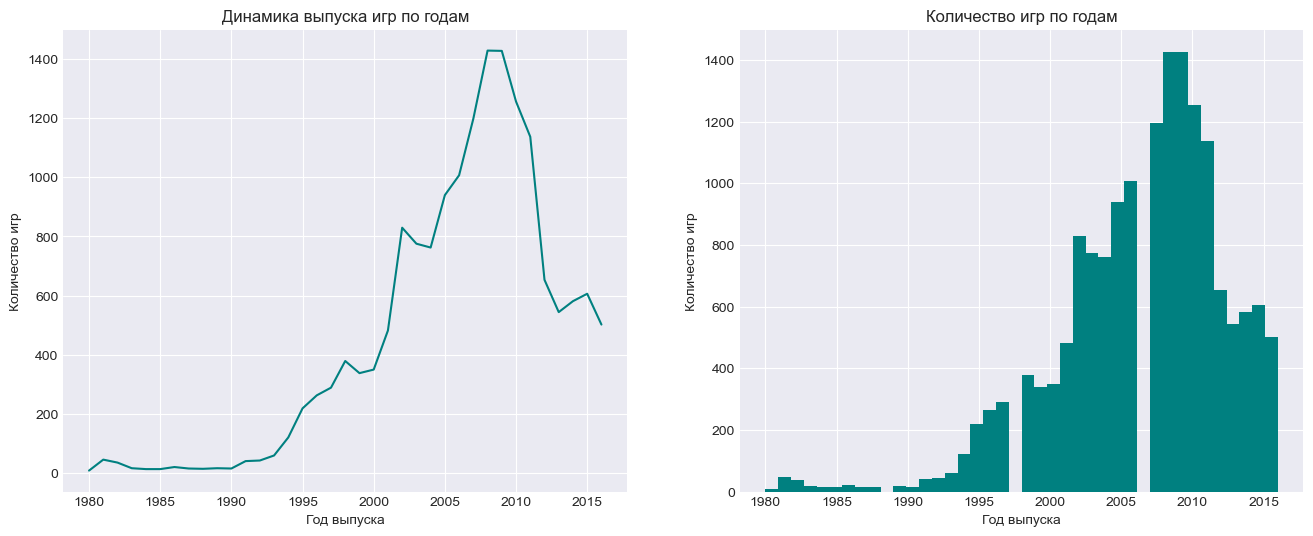

In [23]:
# Сводная таблица по дианмике выпуска игр по годам
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# График, отражающий динамику выпуска игр по годам
ax1.plot(games_year, color='teal')
ax1.grid(True)
ax1.set_title('Динамика выпуска игр по годам')
ax1.set_xlabel('Год выпуска')
ax1.set_ylabel('Количество игр')

# Гистограмма по годам релиза игр
ax2.hist(games['year_of_release'], bins=40, color='teal')
ax2.grid(True)
ax2.set_title('Количество игр по годам')
ax2.set_xlabel('Год выпуска')
ax2.set_ylabel('Количество игр');

Для более точного анализа выведем топ-15 годов по количеству выпущенных игр.

In [24]:
games_year.sort_values(by='name', ascending=False).head(15)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Изучив графики отметим, что первые игры появились в 1980 году, но в первое десятилетие сфера компьютерных игр развивалась очень медленно, поэтому видим минимальное количество игр в данный период. В 90-е годы наблюдаем рост релиза игрушек, компьютерная индустрия начинает постепенно развиваться. В 2000-е годы видим активный рост выпущенных игр, с незначительным спадом в 2002-2004 годы. Самым активным периодом развития геймдева можно назвать 2008 - 2011 годы, за этот период выпущенно максимальное количество игр. Далее наблюдается спад выпуска вплоть до 2016 года, такое снижение, вероятно, связано как с экономическим кризисом, так и со смещением акцента на развитие мобильной разработки.

Таким образом, отвечая на вопрос, важны ли данные за все периоды, приходим к выводу, что для проведения исследования ограничимся актуальным периодом - предположительно, последним десятилетием, которое охватывает основной период развития геймдева. Данные с 2006 года включают в себя различную динамику выпущенных игр, поэтому их будет вполне достаточно. Но перед определением конкретного актуального периода для проведения исследования, рассмотрим динамику продаж по платформам.

**Динамика продаж по платформам и определение актуального периода.**

Посмотрим, как менялись продажи по платформам. Построим график, отражающий зависимость суммарных продаж от платформы игры.

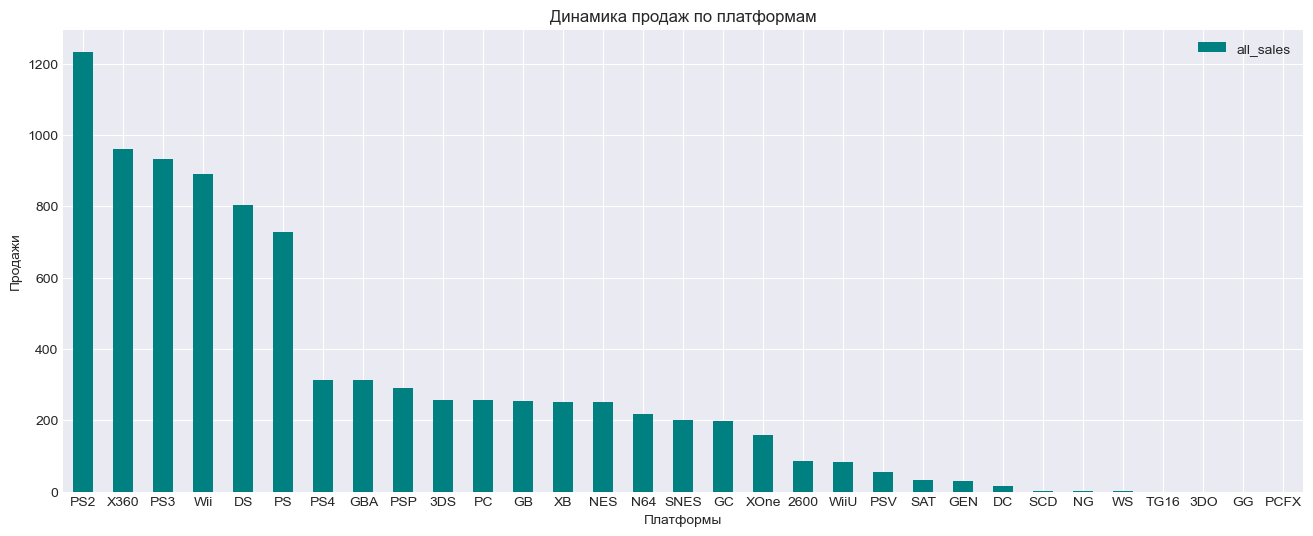

In [25]:
# Сводная таблица по динамике продаж в завсисимости от платформы игры
platform_sales = games.pivot_table(index='platform', values='all_sales', aggfunc='sum')
# График, отражающий зависимость суммарных продаж от платформы
platform_sales.sort_values('all_sales', ascending=False).plot(kind='bar', color='teal', figsize=(16, 6), \
title='Динамика продаж по платформам', rot=0)
plt.xlabel('Платформы')
plt.ylabel('Продажи');

Наблюдаем 6 лидеров платформ, суммарные продажи которых значительно превышают выручку остальных: PS2, X360, PS3, Wii, DS, PS. 

Построим график, отображающий распределение продаж по годам для платформ с наибольшими суммарными продажами. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

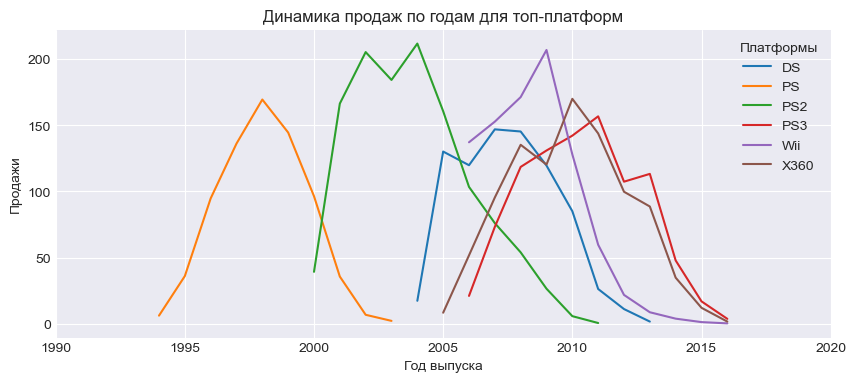

In [26]:
# Таблица для топ-платформ по суммарным продажам
top_platform_sales = games.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')
# Графики с распределением суммарных продаж по годам и платформам
top_platform_year =top_platform_sales.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['all_sales'],
                                 aggfunc =  ['sum'],)
top_platform_year.plot(figsize = (10, 4), title='Динамика продаж по годам для топ-платформ')
plt.xlim([1990, 2020])
plt.xlabel('Год выпуска')
plt.legend(['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'], title='Платформы')
plt.ylabel('Продажи');

Анализируя график, приходим к выводу, что топ-платформы живут примерно по 10 лет. Для более точного расчета выведем медианное значение продолжительности существования для всех платформ.


In [27]:
# Вывод медианы жизни платформ через сводную таблицу по году выпуска игр
platform_life = games.pivot_table(values='year_of_release', index='platform', aggfunc=lambda x: len(x.unique())).median()
print(f'Медиана продолжительности существования всех платформ {int(platform_life[0])} лет.')

Медиана продолжительности существования всех платформ 7 лет.


Таким образом, с учетом нормального распределения продаж по годам, новые платформы активно развиваются в первые 3,5 года, а затем в течение такого же периода уходят с рынка. Брать для прогноза слишком большой период для такой динамичной индустрии как видеоигры - нецелесообразно, можно захватить уходящие тренды. Так как нам необходимо построить прогноз на 2017 год, чтобы не искажать результаты неактуальными данными, не будем учитывать предыдущие годы. Для прогнозирования продаж на будущие периоды чаще всего используют данные за последние 2-3 года, что как раз близко к пику существоания плтатформ. Поэтому в качестве актуального периода возьмем последние 3 года и продолжим работать с данными в диапазоне с 2014 по 2016 годы.

**Определение потенциально прибыльных платформ.**

Определим, какие платформы лидируют по продажам, растут или падают, а также выберем несколько потенциально прибыльных платформ.
Создадим новый датафрейм с данными за актуальный период и построим график, отображающий лидеров платформ по продажам.

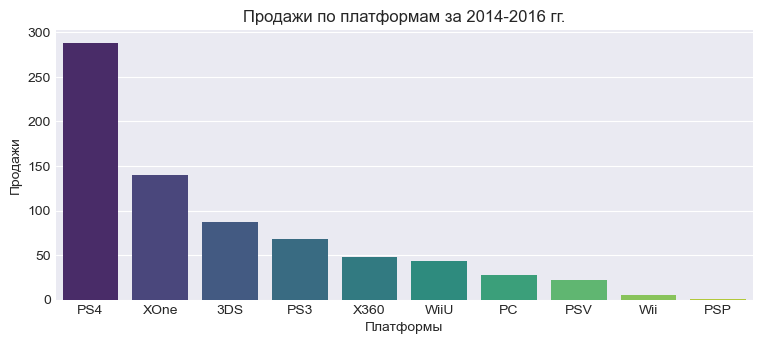

In [28]:
# Новый датафрейм с данными за актуальный период
new_games = games.query('year_of_release >= 2014').copy()
# Построение графика продаж по платформам за 2014-2016 гг. с помощью сводной таблицы 
new_platform_sales = (new_games
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values('all_sales', ascending=False)
)
plt.figure(figsize=(9, 3.5))
(sns.barplot(data = new_platform_sales, x = new_platform_sales.index, y = 'all_sales', palette='viridis')
    .set(title = 'Продажи по платформам за 2014-2016 гг.', xlabel = 'Платформы', ylabel = 'Продажи'));

Таким образом, наблюдаем изменения в рейтинге лидирующих платформ. С учетом актуального периода максимальное колиество продаж у PS4, на втором месте XOne и замыкает тройку лидеров 3DS.

Чтобы увидеть динамику продаж каждой платформы, посмотрим на распределение продаж по годам для каждой платформы.

PS4


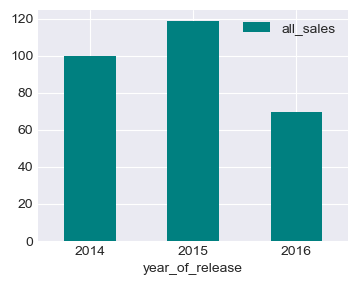

XOne


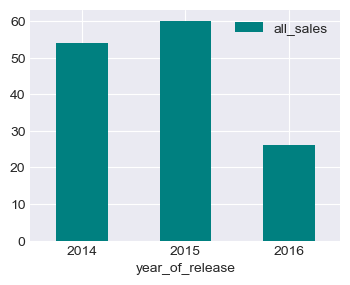

3DS


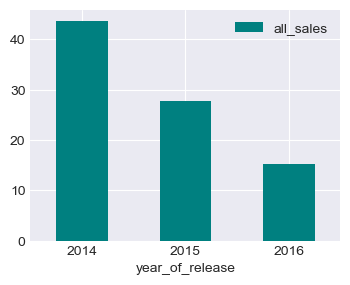

PS3


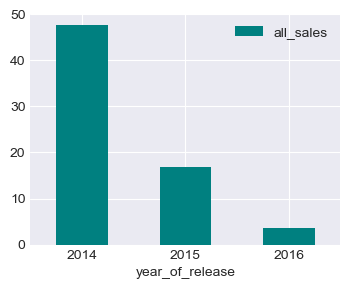

X360


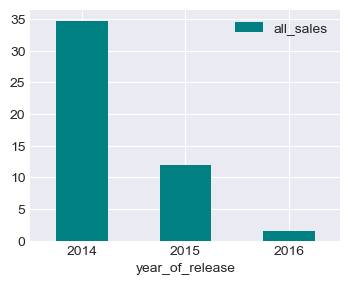

WiiU


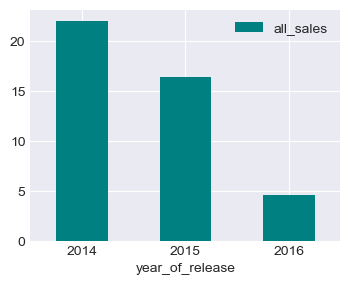

PC


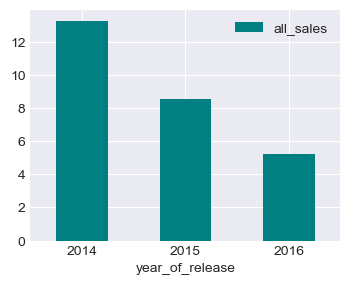

PSV


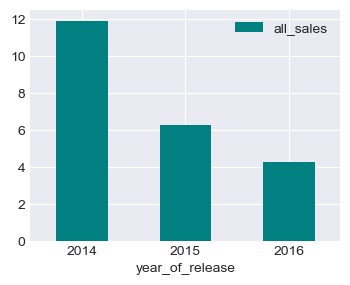

Wii


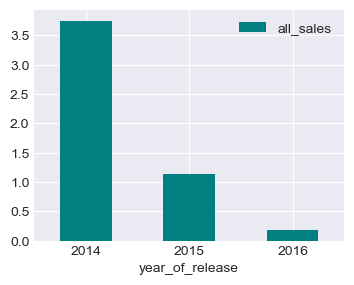

PSP


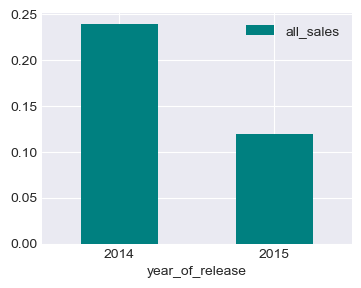

In [29]:
# Цикл для графиков распределения продаж по годам для каждой платформы
for platform in new_platform_sales.index:
    print(platform)
    (new_games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
     .plot(kind='bar', color='teal', figsize = (4, 3), rot=0))
    plt.show()

У большинства платформ в последние годы продажи падают, наблюдаем рост только у лидеров продаж: PS4 и XOne, поэтому отнесем данные платформы к потенциально прибыльным.

Далее построим и интерпретируем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

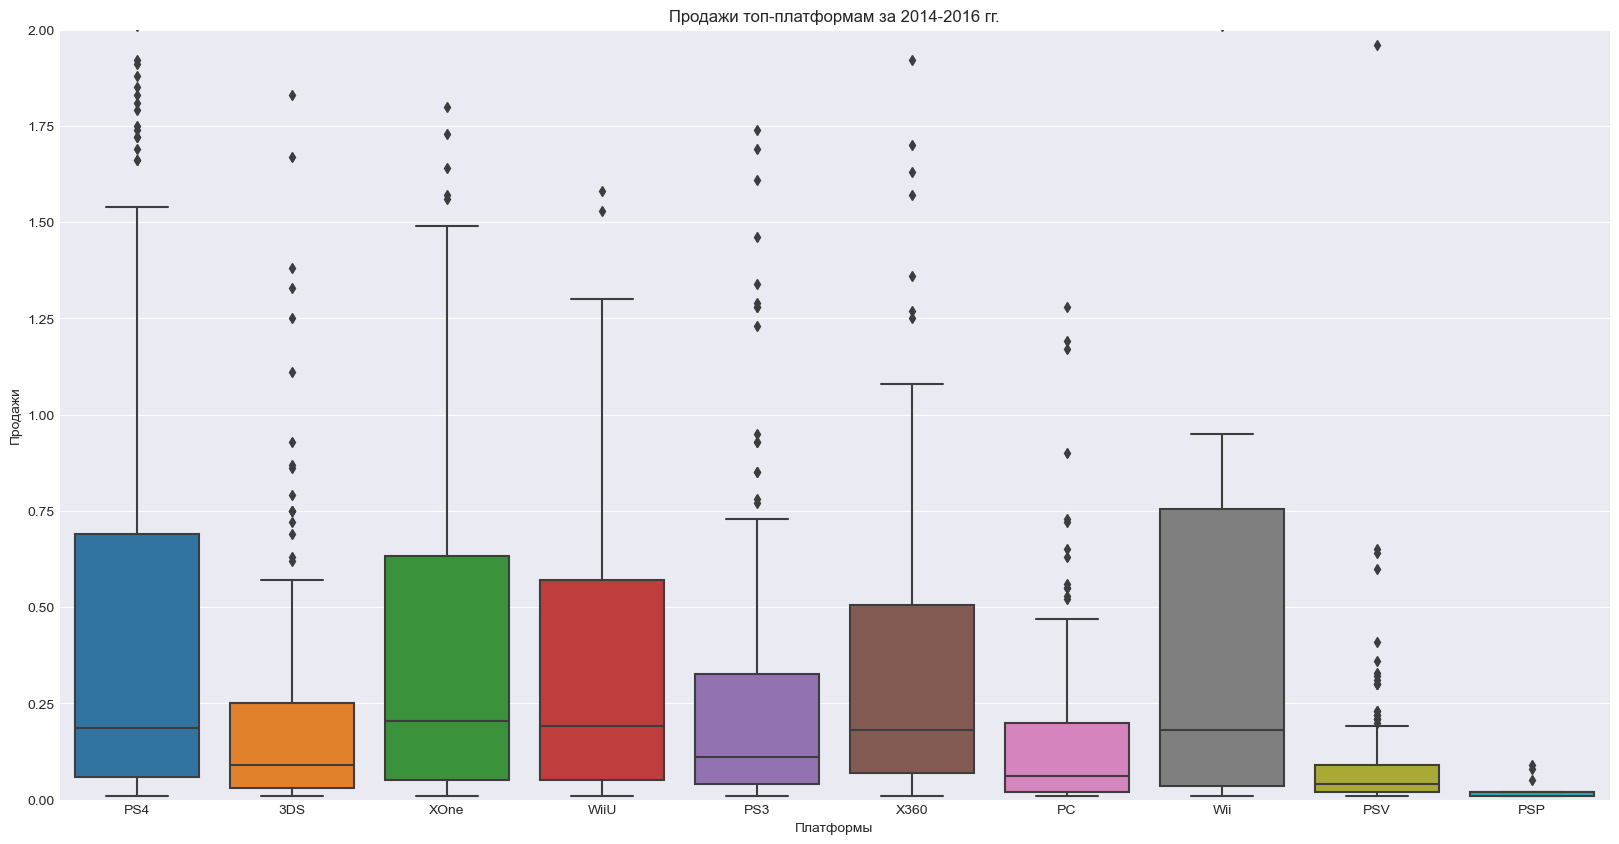

In [30]:
# График по глобальным продажам игр в разбивке по платформам
fig = plt.figure(figsize = (20,10))
sns.boxplot(data = new_games, y = 'all_sales', x='platform').set(title = 'Продажи топ-платформам за 2014-2016 гг.',\
xlabel = 'Платформы', ylabel = 'Продажи', ylim=(0, 2));

Также ознакомимся с основными статистическими характеристиками продаж каждой платформы за актуальный период.

In [31]:
# Cтатистиеские показатели продаж для каждой платформы
new_games.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PC,151.00,0.18,0.33,0.01,0.02,0.06,0.20,3.05
PS3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
PSP,13.00,0.03,0.03,0.01,0.01,0.02,0.02,0.09
PSV,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96
Wii,11.00,0.46,0.63,0.01,0.04,0.18,0.76,2.01
WiiU,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
X360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28


Согласно статистическим показателям, у большинства платформ среднее значение значительно превышает медиану, что говорит о наличии выбивающихся показателей (игр-бестселлеров). Это подтверждается и на диаграмме размаха, наблюдаем аномальне значения за пределами усов для всех платформ, кроме Wii. По медианным показателям лидируют: XOne, WiiU, PS4, Wii и X360, их значения близки - 0.2, 0.19 и 0.18 млн. проданных копий у последней троки платформ. А по распределению всех нормальных значений в тройке лидеров продаж все также PS4 и XOne, а также WiiU.

**Влияние отзывов пользователей и критиков на продажи по платформам.**

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Сначала построим диаграмму рассеяния и посчитайтаем корреляцию между отзывами критиков и продажами для лидера по числу продаж - PS4. 

Коэффициент корреляции Пирсона между продажами и оценками критиков:  0.4


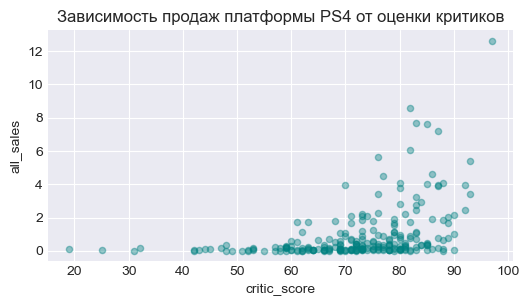

In [32]:
# Таблица для PS4 без заглушек в оценках и диаграмма рассеяния по оценкам критиков
ps4_games = new_games.query('platform == "PS4" & critic_score != -777 & user_score != -777')
ps4_games.plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.4, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы PS4 от оценки критиков');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками критиков: ",\
round(ps4_games['critic_score'].corr(ps4_games['all_sales']), 2))

Коэфициент Пирсона и диаграмма рассеяния подтверждают наличие слабой положительной корреляции продаж платформы PS4 с оценками критиков. Чем выше критики отзывались об игре, тем немногим больше игры продавались.

Проверим, подтвердится ли подобная взаимосвязь продаж этой же платформы от оценки пользователей.
Также построим диаграмму рассеяния и рассчитаем коэффициент корреляции.

Коэффициент корреляции Пирсона между продажами и оценками пользователей:  -0.04


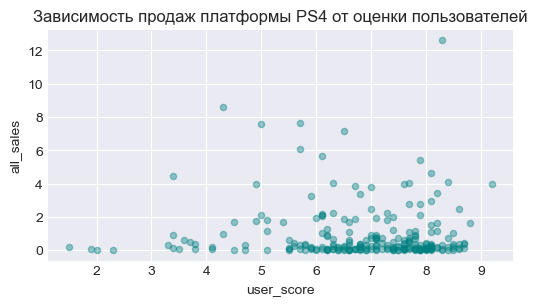

In [33]:
# Диаграмма рассеяния продаж по оценкам пользователей для PS4
ps4_games.plot(kind='scatter', x='user_score', y='all_sales', alpha=0.4, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы PS4 от оценки пользователей');                                               
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками пользователей: ",\
round(ps4_games['user_score'].corr(ps4_games['all_sales']), 2))

С оценками пользователей для платформы PS4 картина иная, с учетом практически нулевого коэффициента Пирсона, можем сделать вывод об отсутствии взаимосвязи оценок с объемом проданных игр, что подтверждается и диаграммой.

Соотнесем выводы с продажами игр на других платформах. Исследуем, как влияют на продажи пользовательские отзывы и оценки критиков для другой потенциально прибыльной консоли Xbox One. Построим диаграмму рассеяния и рассчитайтаем корреляцию между отзывами критиков и продажами.

Коэффициент корреляции Пирсона между продажами и оценками критиков:  0.42


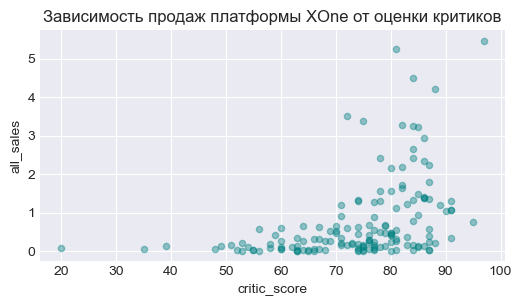

In [34]:
# Таблица для XOne без заглушек в оценках и диаграмма рассеяния по оценкам критиков
xone_games = new_games.query('platform == "XOne" & critic_score != -777 & user_score != -777')
xone_games.plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.4, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы XOne от оценки критиков');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками критиков: ",\
round(xone_games['critic_score'].corr(xone_games['all_sales']), 2))

Диаграмма рассеяния и полученный коэффициент Пирсона схожи с корреляцией между продажами и оценками критиков для консоли PS4. Прослеживается слабая положительная взаимосвязь. Проверим, изменится ли влияние пользовательких оценок для платформы XOne. 

Коэффициент корреляции Пирсона между продажами и оценками пользователей:  -0.09


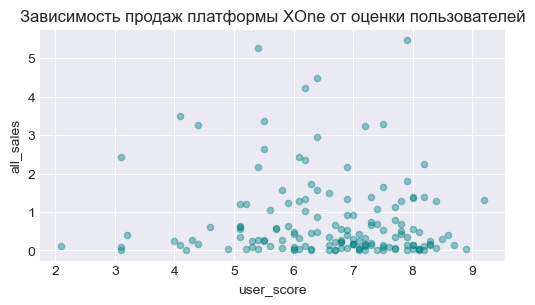

In [35]:
# Диаграмма рассеяния продаж по оценкам пользователей для XOne
xone_games.plot(kind='scatter', x='user_score', y='all_sales', alpha=0.4, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы XOne от оценки пользователей');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками пользователей: ",\
round(xone_games['user_score'].corr(xone_games['all_sales']), 2))

Явных изменений не наблюдаем, диаграмма рассеяния и коэффициент корреляции подтверждают, что для консоли XOne также не прослеживается взаимосвязь между оценками пользователей и объемом проданных игр как и для PlayStation 4.

Определим, влияют ли оценки пользователей и критиков на объем игровых продаж японской популярной платормы 3DS. Для этого отобразим диаграмму рассеяния и рассчитайтаем коэффициент Пирсона между отзывами критиков и продажами.

Коэффициент корреляции Пирсона между продажами и оценками критиков:  0.28


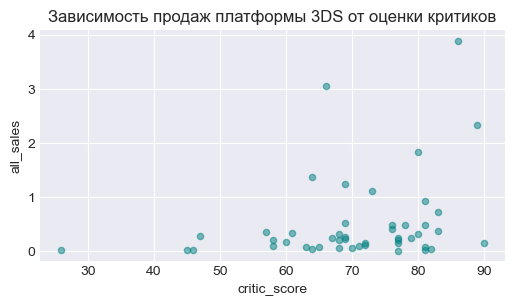

In [36]:
# Таблица для 3DS без заглушек в оценках и диаграмма рассеяния по оценкам критиков
ds3_games = new_games.query('platform == "3DS" & critic_score != -777 & user_score != -777')
ds3_games.plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.5, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы 3DS от оценки критиков');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками критиков: ",\
round(ds3_games['critic_score'].corr(ds3_games['all_sales']), 2))

Имеется очень слабая взаимосвязь между продажами и рейтингом критиков, коэффициент Пирсона ниже, чем у потенциально прибыльных платформ. Проверим, сохранится ли тенденция отсутствия зависимости игоровых продаж от пользовательских оценок.

Коэффициент корреляции Пирсона между продажами и оценками пользователей:  0.28


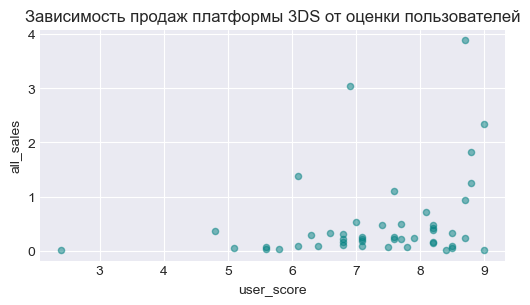

In [37]:
# Диаграмма рассеяния продаж по оценкам пользователей для 3DS
ds3_games.plot(kind='scatter', x='user_score', y='all_sales', alpha=0.5, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы 3DS от оценки пользователей');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками пользователей: ",\
round(ds3_games['user_score'].corr(ds3_games['all_sales']), 2))

Прослеживается также очень слабая взаимосвязь между продажами и пользовательским рейтингом, соответственно, коэффициент Пирсона выше, чем у потенциально прибыльных платформ. 

Также проверим, как влияют оценки критиков и пользователей на игровые продажи другого продукта компании Sony - PS3. 

Коэффициент корреляции Пирсона между продажами и оценками критиков:  0.45


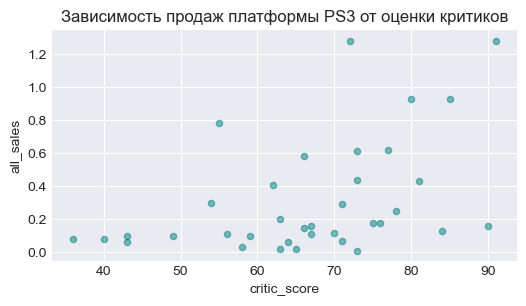

In [38]:
# Таблица для PS3 без заглушек в оценках и диаграмма рассеяния по оценкам критиков
ps3_games = new_games.query('platform == "PS3" & critic_score != -777 & user_score != -777')
ps3_games.plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.5, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы PS3 от оценки критиков');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками критиков: ",\
round(ps3_games['critic_score'].corr(ps3_games['all_sales']), 2))

Общая тенденция сохраняется, прослеживается слабая корреляция между рейтингом критиков и объемом проданных игр. Проверим, подтвердится ли подобная взаимосвязь продаж этой же платформы с оценками пользователей.

Коэффициент корреляции Пирсона между продажами и оценками пользователей:  0.16


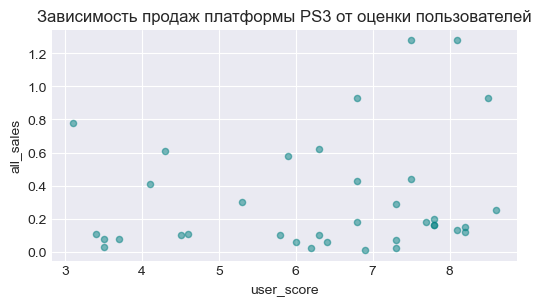

In [39]:
# Диаграмма рассеяния продаж по оценкам пользователей для PS3
ps3_games.plot(kind='scatter', x='user_score', y='all_sales', alpha=0.5, figsize = (6,3),\
color='teal', title='Зависимость продаж платформы PS3 от оценки пользователей');
# Рассчитаем коэфициент корреляции и округлим до 2 знаков после запятой
print("Коэффициент корреляции Пирсона между продажами и оценками пользователей: ",\
round(ps3_games['user_score'].corr(ps3_games['all_sales']), 2))

Исходя из диаграммы рассеяния и полученного коэффициента Пирсона, отметим, что прослеживается очень слабая корреляция между пользовательским рейтингом и объемом проданных игр.

Полученные коэффициенты Пирсона для PS4 и других популярных платформ имеют близкие значения, поэтому и выводы схожи. Для других платформ взаимосвязь между игровыми продажами и пользовательским рейтингом либо не выявлена, и коэффициент корреляции близок к нулевому значению, либо прослеживается очень слабая корреляция. И в то же время наблюдается слабая положительная корреляция объема проданных игр с оценками критиков.

**Распределение игр по жанрам и определение самых прибыльных из них.**

Определим наиболее прибыльный жанр и проверим, выделяются ли жанры с высокими и низкими продажами. Сперва выведем сводную таблицу, где для каждого жанра отобразим количество, сумму и медиану глобальных продаж. 

In [40]:
# Сводная таблица по жанрам игр с количеством, суммой и медианой продаж
genre_games = new_games.pivot_table(index='genre', values='all_sales', aggfunc =['count', 'sum', 'median'])
genre_games.sort_values(by=('median', 'all_sales'), ascending=False).style.format('{:.2f}').background_gradient(cmap='GnBu')

,count,sum,median
,all_sales,all_sales,all_sales
genre,,,
Shooter,128.00,170.94,0.52
Sports,161.00,109.48,0.18
Platform,38.00,18.09,0.14
Fighting,60.00,28.22,0.12
Role-Playing,221.00,101.44,0.11
Simulation,44.00,13.13,0.10
Action,619.00,199.36,0.09
Misc,113.00,37.55,0.09


Наблюдаем, что рейтинги жанров по общей сумме продаж и медианным продажам значительно отличаются. Лидер по количеству игр и сумме продаж - экшен, а по медиане продаж значительное превосходство у шутеров. Так какой же жанр можно назвать самым прибыльным?

Для начала посмотрим на распределение количества игр по жанрам.

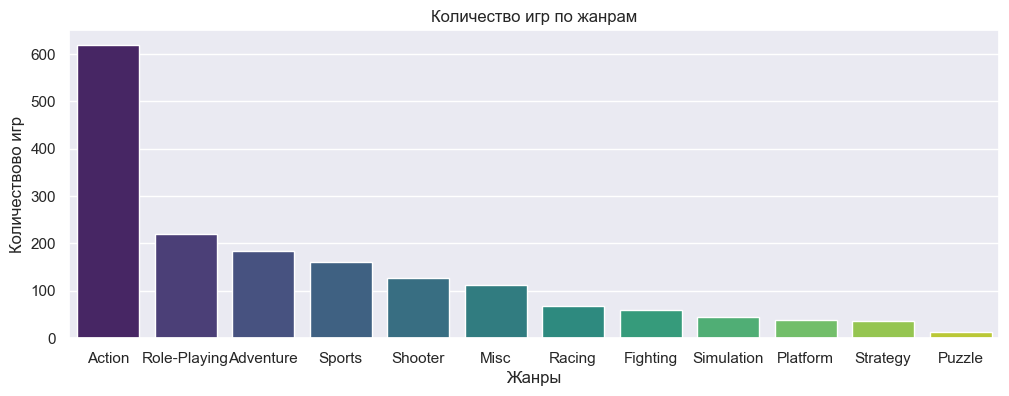

In [41]:
# Гистограмма по количеству игр для каждого жанра
sns.set(rc={'figure.figsize':(12,4)})  
sns.barplot(data = genre_games.reset_index().sort_values(by=('count', 'all_sales'), ascending=False),\
x="genre", y=('count', 'all_sales'), palette='viridis')
plt.title('Количество игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количествово игр');

По количеству игр явным лидером яляется экшен, почти втрое меньше у ролевых игр и третье место среди лидеров - у приключенческих игрушек. Менее популярны - платформеры, стратегии и головоломки.

Отобразим распределение сумм продаж по жанрам.

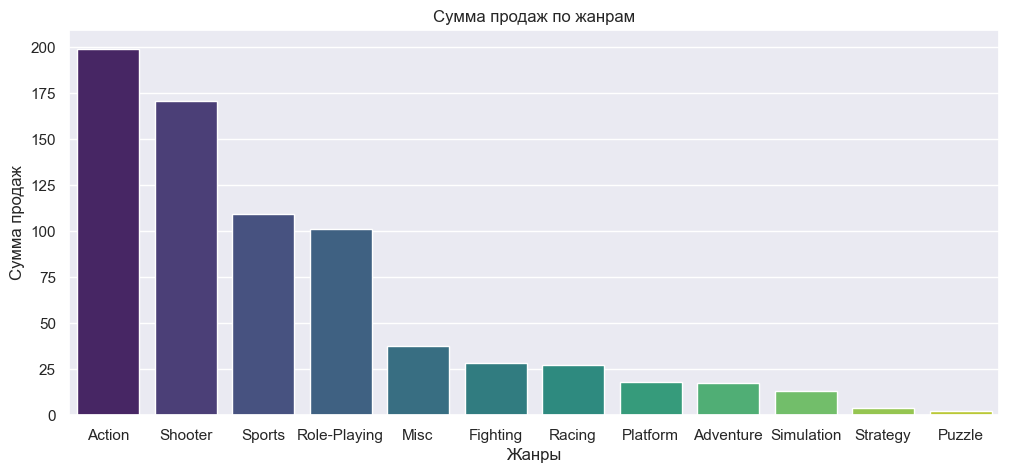

In [42]:
# Гистограмма по сумме проданных игр для каждого жанра
plt.figure(figsize=(12, 5))
sns.barplot(data = genre_games.reset_index().sort_values(by=('sum', 'all_sales'), ascending=False),\
x="genre", y=('sum', 'all_sales'), palette='viridis')
plt.title('Сумма продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж');

По сумме проданных копий игр лидер тот же - экшен, немного уступают шутеры и замыкают тройку спортивные симуляторы. Минимальные суммы проданных копий игр у симуляторов, стратегий и головоломок. 

Посмотрим, как изменится распредение медианных продаж по жанрам.

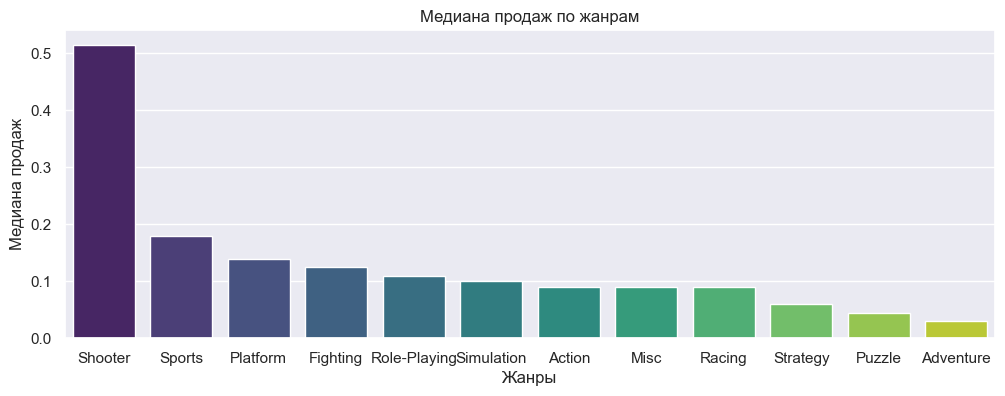

In [43]:
# Гистограмма по медиане продаж для каждого жанра
plt.figure(figsize=(12, 4))
sns.barplot(data = genre_games.reset_index().sort_values(by=('median', 'all_sales'), ascending=False),\
x="genre", y=('median', 'all_sales'), palette='viridis')
plt.title('Медиана продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Медиана продаж');

По медианным продажам со значительным превосходством лидируют шутеры, далее спортивные игрушки и платформеры. Минимальное количество проданных копий игр у стратегий, головоломок и приключенческих игрушек.

Для определения наиболее прибльного жанра не стоит ориентироваться на общие суммы продаж, т.к. за их высокими показателями  может скрыватся большое число игр с низкими продажами. Поэтому выберем такие жанры, где игры стабильно приносят высокий доход, т.е. будем ориентироваться на распредение медианных продаж по жанрам.

**Вывод:**

В процессе исследовательского анализа данных, используя сводные таблицы и графики, изучили динамику выпуска игр по годам. Пришли к выводу, что в среднем новые платформы существуют порядка 7 лет, поэтому для проведения анализа и составления прогноза на 2017 год нужно будет взять данные за определенный актуальный период, в нашем случае последние 3 года. Следовательно, в качестве выборки для проведения анализа использовали данные за 2014-2016 годы. 

Рассмотрели динамику продаж по платформам, с использованием диаграммы размаха отметили, что у большиинства платформ есть блокбастеры, продажи которых являются аномально высокими. Определили потенциально прибыльные консоли  PS4 и XOne, продажи которых не только высоки, но и продолжают расти в последние годы.

В рамках проведения анализа оценили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и рассчитали корреляцию между отзывами и продажами для PS4, а также рассчитали коэффициенты Пирсона для других популярных платформ. Выявили слабую положительную корреляцию продаж платформ с оценками критиков, а также отсутствие взаимосвязи, либо очень слабую корреляцию пользовательских оценок с объемом проданных игр для некоторых платформ.

Также на данном этапе исследования посмотрели на общее распределение игр по жанрам. По количеству игр и суммарным продажам лидером яляется жанр экшен, но для определения наиболее прибыльного жанра следует ориентироваться на стабильно высокие продажи. По медианным продажам со значительным превосходством лидируют шутеры, а минимальное количество проданных копий игр у стратегий, головоломок и приключенческих игрушек.

## Составление портрета пользователя каждого региона.

Чтобы составить портрет пользователя каждого региона, определим самые популярные игровые платформы и жанры в Северной Америке, Европе и Японии. А также узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе.

- **Популярные платформы для пользователей каждого региона.**

Посмотрим, какие платформы наиболее популярны в различных регионах. Выведем сводную таблицу с суммой продаж (в миллионах проданных копий) для каждой игровой платформы по выбранным рынкам.

In [44]:
# Cводная таблица по платформам и продажам каждого региона
display(new_games.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum')\
.style.format('{:.2f}').background_gradient(cmap='GnBu'))

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


Можем отметить, что в Европе и Северной Америке схожи предпочтения по выбору платформы, но они значительно отличаются от лидирующих платформ в Японии. Для более удобного анализа визуализируем распределения сумм продаж каждого региона для топ-5 платформ. Для этого с помощью дополнительных группировок построим гистограммы по каждому региону.

In [45]:
# Группировка по платформам и продажам каждого региона
na_platform = new_games.groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_platform = new_games.groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_platform = new_games.groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

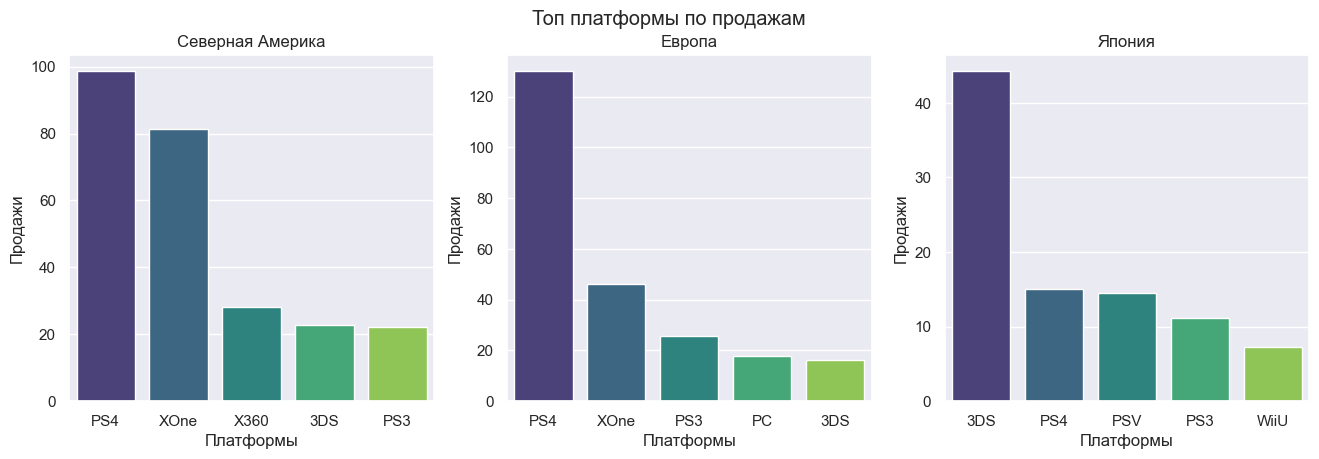

In [46]:
# Графики распределениея продаж каждого региона для топ платформ 
fig, ax = plt.subplots(1, 3, figsize=(16, 4.5))
fig.suptitle('Топ платформы по продажам')
sns.barplot(y='na_sales', x='platform', data=na_platform, ax=ax[0], palette='viridis')
ax[0].set_title('Северная Америка')
ax[0].set_xlabel('Платформы')
ax[0].set_ylabel('Продажи')
sns.barplot(y='eu_sales', x='platform', data=eu_platform, ax=ax[1], palette='viridis')
ax[1].set_title('Европа')
ax[1].set_xlabel('Платформы')
ax[1].set_ylabel('Продажи')
sns.barplot(y='jp_sales', x='platform', data=jp_platform, ax=ax[2], palette='viridis')
ax[2].set_title('Япония')
ax[2].set_xlabel('Платформы')
ax[2].set_ylabel('Продажи');

Общий состав топ-5 платформ пользователей Северной Америки и Европы похож, 4 платформы представлены в лидерах обоих регионов. Првеосходство по продажам у PS4, причем европейская сумма млн. проданных копий игр первышает американскую. На втором месте XOne, здесь наоборот, у американцев она пользуется большим интересом, нежели у европейцев. Замыкают топ-5 в Северной Америке X360, 3DS и PS3, суммы продаж данных платформ практически в 5 раз ниже, чем у лидирующей плтформы.

В Европе 3, 4 и 5 места у PS3, PC и 3DS соответственно. Разрыв между этими платформами незначительный, чего нельзя сказать об отношении суммы продаж лидера рейтинга. У PS4 сумма продаж превосходит продажи 3DS более чем в 6 раз.

И новые платформы представлены в лидерах японских пользователей. Наиболее популярна 3DS, ее продажи практически в 4 раза выше конкурентов. У замыкающих рейтинг топ платформ - PSV, PS3 и WiiU суммы продаж близки. 

Отметим, что в каждом регионе в топ-5 игровых платформ попала продукия Sony, следовательно, репутациия компании влияет на популярность платформы. Определенное значение имеет и локация компании, так в Северной Америке прослеживается сильная конкуренция между PS4 и XOne (которой нет в Европе), это обусловлено наличием местного сильного игрока Microsoft. Подтверждением этого являеется и наличие в тройке лидеров для североамериканских пользователей платформы X360, производителем которой также является Microsoft. В Японии сильным игроком является местная компания Nintendo, поэтому лидером их рейтинга платформ является 3DS, а также появляется WiiU. В Европе нет подобных компаний, поэтому пользователи ориентируются на общую популярность платформы.

- **Популярные жанры для пользователей каждого региона.**

Найдем самые популярные жанры для пользователей Европы, Северной Америки и Японии. Создадим сводную таблицу с суммой продаж (в миллионах проданных копий) для каждого жанра по выбранным регионам.

In [47]:
# Cводная таблица по жанрам и продажам каждого региона
display(new_games.pivot_table(index='genre', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum')\
.style.format('{:.2f}').background_gradient(cmap='GnBu'))

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


Наблюдаем схожие предпочтения игровых жанров у американцев и европецев. Экшен, шутеры и спортивные игры наиболее востребованы как в Северной Америке, так и в Европе. У американских пользователей максимальные суммы продаж собирают шутеры, а у европейских - экшен. В Японии экшен также популярен, и уступает в лидерстве лишь ролевым играм.

Наименьший интерес пользователей каждого из трех регионов - к стратегиям и головоломкам.

Для лучшей визуализации долей проданных игр по топ-5 жанрам построим круговые диаграммы для каждого региона.

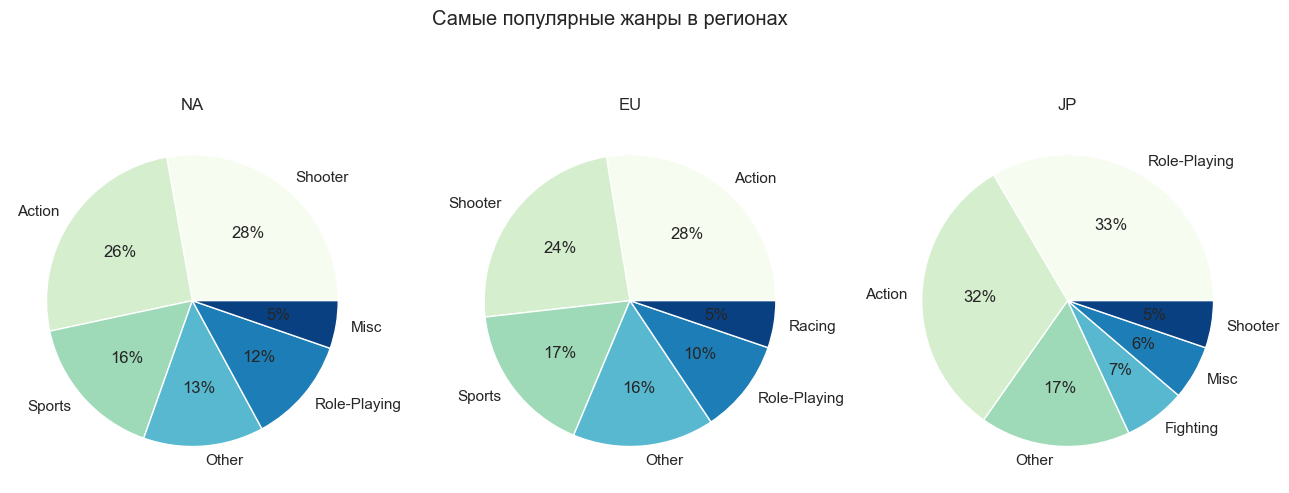

In [48]:
# Выберем список регионов из названий столбцов датарейма
regions = new_games.columns[4:7]

# Построим круговые диаграммы для каждого региона
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Самые популярные жанры в регионах')
# Выбор топ-5 жанров для каждого региона
for i in range(3):
    top_genres = (new_games.groupby('genre')[regions[i]].sum().
                 reset_index().
                 sort_values(regions[i], ascending=False, ignore_index=True).
                 head(5))
    # Отнесем остальные жанры в категорию «другие»
    dict_to_concat = {'genre': ['Other'], regions[i]: [new_games[regions[i]].sum() - top_genres[regions[i]].sum()]}
    top_genres = pd.concat([top_genres, pd.DataFrame().from_dict(dict_to_concat)], ignore_index= True)
    # Строим диаграммы
    top_genres[regions[i]].sort_values(ascending=False).plot(y=regions[i], kind='pie', cmap='GnBu', autopct='%1.f%%', ax=ax[i], \
    label='', labels = top_genres.sort_values(by=regions[i], ascending=False)['genre']);
    
    # Укажем название региона
    ax[i].set_title(top_genres.columns[1].split('_')[0].upper());

Таким образом, на диаграммах отражены топ-5 жанров для каждого региона, менее популярные отнесли в категорию «другие». Вновь отмечаем схожие предпочтения в игровых жанрах у североамериканцев и европейцев. В Японии экшен и шутеры тоже популярны, но наиболее востребованы ролевые игры.

**Топ-5 популярных жанров в Северной Америке:**
- шутеры
- экшен
- спортивные игры
- ролевые игры
- аркады 

В Северной Америке наблюдается не очень равномерное распределение игровых жанров. Наиболее популярны жанры шутер и экшен, их общая доля продаж составляет чуть более половины от суммарных продаж всех игровых жанров. Также  пользуются спросом сопртивные и ролевые игры, а замыкают рейтинг лидирующих жанров - аркады.

Посмотрим на жанровые предпочтения европейских пользователей. 

**Топ-5 популярных жанров в Европе:**
- экшен
- шутеры
- спортивные игры
- ролевые игры
- гонки

В Европе распределение жанровых предпочтений также сложно назвать равномерным. Общая доля продаж экшенов и шутеров также составляет чуть более половины от суммарных продаж всех игровых жанров. Также как и североамериканцам европейцам интересны спортивные и ролевые игры. И единственным отличием в рейтинговых составах самых популярных жанров этих регионов является наличие гонок.

Осталось проанализировать, какие жанры предпочитают в Японии.

**Топ-5 популярных жанров в Японии:**
- ролевые игры
- экшен
- файтинги
- аркады
- шутеры

В Японии распределение жанровых предпочтений наименее равномерное. Со значительным отрывом лидируют ролевые игры и экшены, их общая доля проданных игр составляет почти 2/3 от суммарных продаж всех жанров. В топ-5 среди японцев также попали файтинги, аркады и шутеры, доли которых незначительно отличаются между собой.

Изучив диаграммы по каждому региону, можем резюмировать, что жанровые предпочтения пользователей Северной Америки и Европы схожи. Так, наиболее популярны в этих регионах шутеры, экшен, спортивные и ролевые игры. А японцам также интерсны экшен и шутеры, но наибольшее предпочтение отдают ролевым играм. В жанровом рейтинге японских пользователей также файтинги и  аркады. Следовательно, популярность игрового жанра в некоторой степени зависит от культуры и территориального фактора, так как в одном из регионов предпочтения пользователей отличаются.

- **Влияние рейтинга Entertainment Software Rating Board на продажи в отдельном регионе.**

Далее выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе. Выведем сводную таблицу по рейтингу от организации ESRB и суммарным продажам игр каждого региона.

In [49]:
# Сводная таблица по рейтингу от ESRB и продажам для каждого региона
top_rating = new_games.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum')
display(top_rating.style.format('{:.2f}').background_gradient(cmap='GnBu'))

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


По суммарным продажам В Северной Америке и Европе с большим преимуществом лидируют игры «Для взрослых», также в этих регионах популярны игры для всех. В Японии же максимальные продажи у игр для «Подростков», такие игрушки подходит для лиц от 13 лет. Отметим, что у значительной части проданных игр во всех регионах рейтинг не определен.

Для более удобного анализа долей проданных игр по рейтингам посторим диаграммы, отражающие популярность рейтинга от организации ESRB для каждого региона.

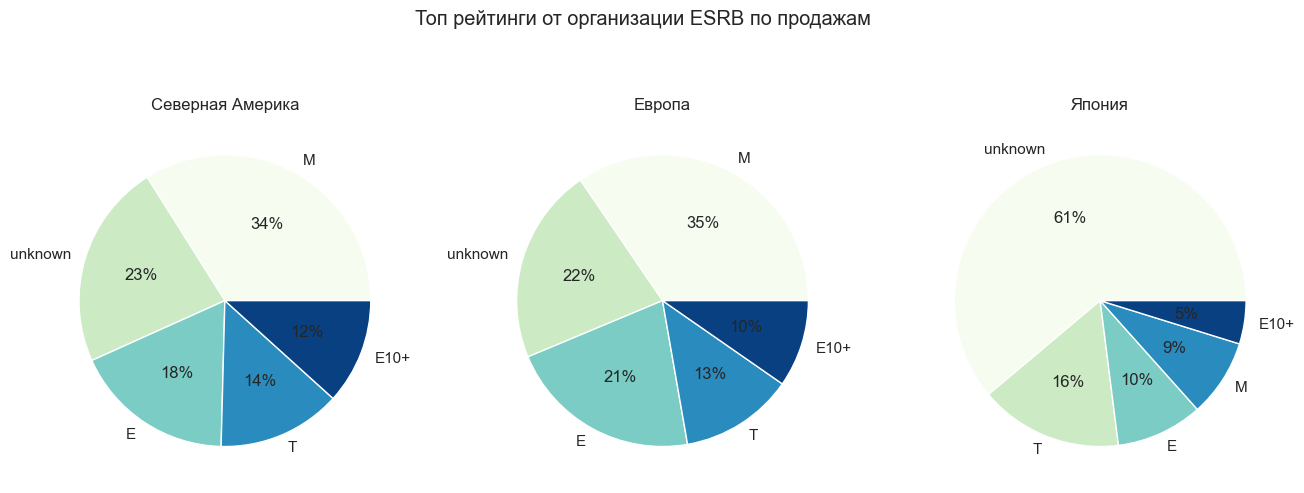

In [50]:
# Диаграммы распределениея долей продаж рейтинга каждого региона
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Топ рейтинги от организации ESRB по продажам')
top_rating['na_sales'].sort_values(ascending=False).plot(kind='pie', cmap='GnBu', autopct='%1.0f%%', label='', ax=ax[0]);
ax[0].set_title('Северная Америка')
top_rating['eu_sales'].sort_values(ascending=False).plot(kind='pie', cmap='GnBu', autopct='%1.0f%%', label='', ax=ax[1]);
ax[1].set_title('Европа')
top_rating['jp_sales'].sort_values(ascending=False).plot(kind='pie', cmap='GnBu', autopct='%1.0f%%', label='', ax=ax[2]);
ax[2].set_title('Япония');

На каждой диаграмме распределение долей рейтингов неравномерное, данное наблюдение подтверждает, что рейтинг ESRB оказывает определенное влияние на игровые продажи.

Прослеживается довольно схожее распределение долей рейтингов в Северной Америке и Европе. Данные рынки в большей степени ориентированы на игрушки «Для взрослых», доля продаж игр с таким рейтингом более 1/3 от суммарных игровых продаж региона. Также пользователям этих регионов интересны игры «Для всех», меньшим спросом среди европейцев и североамериканцев пользуются игры для «Подростков» и «Для всех от 10 лет и старше».

В Японии же компании хотят распространить свое влияние на новое поколение, наиболее популярны игры  для «Подростков», а меньший интерес вызывают игры «Для всех от 10 лет и старше». Также стоит отметить, что в Японии значительная часть проданных игр не имеет рейтинг, это может быть обусловлено тем, что компания ESRB в основном оценивает Американские и Канадские компании. Также лидерство игр без рейтинга от ESRB в Японии, можно объяснить возможным наличием там своего стандарта для рейтингов.

**Вывод:**

На данном этапе исследования построили графики распределения продаж каждого региона для топ платформ и пришли к выводу, что рейтинги популярных платформ для европейцев и североамериканцев схожи, на данных рынках лидируют PS4 и XOne. А у японцев в лидеры выбивается местная платформа - 3DS. В связи с этим сделали вывод, что на популярность платформы влияют как общая репутация компании, так и наличие местного сильного производителя.

Для определения популярных игровых жанров в Северной Америке, Европе и Японии воспльзовались сводной таблицей и круговыми диаграммами. Во всех регионах наблюдается неравномерное распределение игровых жанров. Жанровые предпочтения европейцев и североамериканцев схожи, наиболее популярны шутеры, экшен, спортивные и ролевые игры. В Северной Америке лидуруют шутеры, а в Европе - экшен. В Японии распределение жанровых предпочтений более неравномерное. Со значительным отрывом в лидерах ролевые игры, а также популярны экшен, файтинги, аркады и шутеры. Популярность игрового жанра в некоторой степени зависит от культуры и территориального фактора, так как в одном из регионов предпочтения пользователей отличаются.

Для определения влияния рейтинга ESRB на продажи в отдельном регионе также использовали сводную таблицу и диаграммы. 
Отметили наличие влияния рейтинга на европейском, североамериканском и японском рынках. Среди европейцев и американцев наибольший интерес вызывают игры «Для взрослых», а у японских пользователей лидируют игры для «Подростков». Также обратили внимание, что у значительной части проданных игр во всех регионах рейтинг не определен.

## Проверка гипотез.

**Проверка гипотезы: «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые».**

Проверим, отличаются ли средние пользовательские рейтинги платформ Xbox One и PC. Сформулируем нулевую и альтернативную гипотезы.

- **Hулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC равны.

- **Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Для проверки гипотезы отфильтруем маркерные значения в пользовательских оценках, создадим две выборки с оценками пользователей для игровых платформ XOne и PC, рассчитаем и выведем средние значения каждой выборки. Также построим столбчатую диаграмму с распредлением средних пользовательских оценок по платформам.

In [51]:
# Отфильтруем заглушки в датафрейме с актуальным периодом
new_games = new_games[new_games['user_score'] != -777]
# Создадим выборки с оценками пользователей для платформ XOne и PC
xone_score = new_games.query('platform == "XOne"')['user_score']
pc_score = new_games.query('platform == "PC"')['user_score']
# Вывод средних значений выборок
print(f'Средняя пользовательская оценка игровой платформы XOne: {round(xone_score.mean(), 2)}.')
print(f'Средняя пользовательская оценка игровой платформы PC: {round(pc_score.mean(), 2)}.')

Средняя пользовательская оценка игровой платформы XOne: 6.59.
Средняя пользовательская оценка игровой платформы PC: 6.3.


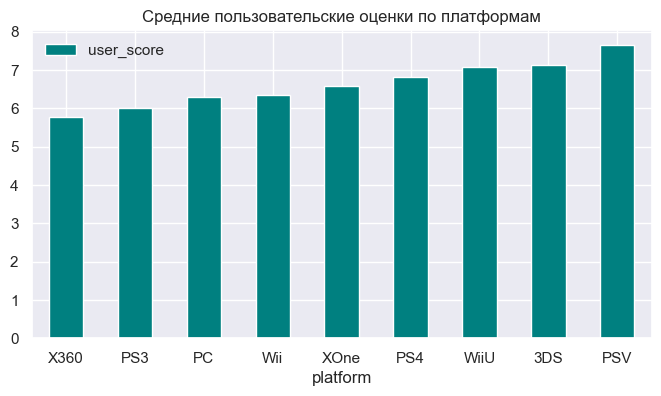

In [52]:
# Строим столбчатую диаграмму средних рейтингов пользователей по платформам
new_games.pivot_table(index='platform', values='user_score').sort_values(by='user_score').plot(kind='bar', grid=True,\
color='teal', title='Средние пользовательские оценки по платформам', figsize=(8,4), rot=0);

Исходя из распредления среднего пользовательского рейтинга по платформам, видим что распределение оценок достаточно равномерное для всех платформ, и средний пользовательский рейтинг платформ XOne и PC незначительно отличаются. Рассчитав их средние значения можем сделать вывод, что cредняя оценка пользователей платформы XOne немного выше, но в целом значения близки. Правда, вывод о значимости этой разницы всё равно не сделать без статистического теста. Перед проведением теста убедимся, достаточный ли объем выборок и сравним их дисперсии.

In [53]:
# Вывод объема выборок и их дисперсий
print(f'Платформа XOne: объем выборки {len(xone_score)}, дисперсия = {round(np.var(xone_score), 2)}.')
print(f'Платформа PC: объем выборки {len(pc_score)}, дисперсия = {round(np.var(pc_score), 2)}.')

Платформа XOne: объем выборки 165, дисперсия = 1.88.
Платформа PC: объем выборки 122, дисперсия = 2.88.


Объем выборок достаточный, а дисперсии не равны, учтем это при проведении теста. Воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и проведем t-тест. При проверке установим уровень статистической значимости 0.05.

In [54]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(xone_score, pc_score, equal_var=False)
# критический уровень статистической значимости
alpha = .05
# вывод значения p-value
print(f'P-value =', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

P-value = 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу.


Таким образом, на основании проведенного статистического теста мы не можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются. Вероятность того, что средние пользовательские рейтинги данных платформ равны выше критического уровня статистической значимости.

**Проверка гипотезы: «Средние пользовательские рейтинги жанров Action и Sports разные».**

На заключительном этапе проверим, отличаются ли средние пользовательские рейтинги у различных игровых жанров. Построим график, отражающий распределение средних пользовательских оценок по игровым жанрам.

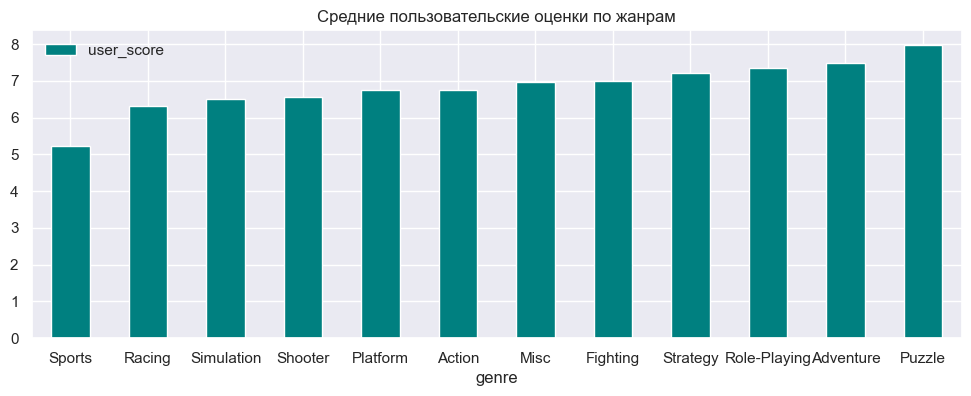

In [55]:
# Строим столбчатую диаграмму средних рейтингов пользователей по жанрам
new_games.pivot_table(index='genre', values='user_score').sort_values(by='user_score').plot(kind='bar', grid=True,\
color='teal', title='Средние пользовательские оценки по жанрам', figsize=(12,4), rot=0);

Для большинства игровых жанров распределение среднего пользовательского рейтинга равномерное. Но в то же время есть два выделяющихся жанра, максимальная средняя пользовательская оценка у головоломок, а минимальная - у спортивных симуляторов.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Сформулируем нулевую и альтернативную гипотезы.

**Hулевая гипотеза:** Средние пользовательские рейтинги игровых жанров Action и Sports равны.

**Альтернативная гипотеза:** Средние пользовательские рейтинги игровых жанров Action и Sports отличаются.

Для проверки гипотезы создадим две выборки с оценками пользователей для игровых жанров экшен и спортивных симуляторов, а также рассчитаем и выведем средние значения каждой выборки. 

In [56]:
# Создадим выборки с оценками пользователей для жанров Action и Sports
action_score = new_games.query('genre == "Action"')['user_score']
sports_score = new_games.query('genre == "Sports"')['user_score']
# Вывод средних значений выборок
print(f'Средняя пользовательская оценка игрового жанра Action: {round(action_score.mean(), 2)}.')
print(f'Средняя пользовательская оценка игрового жанра Sports: {round(sports_score.mean(), 2)}.')

Средняя пользовательская оценка игрового жанра Action: 6.76.
Средняя пользовательская оценка игрового жанра Sports: 5.23.


Исходя из распредления среднего пользовательского рейтинга по игровым жанрам и рассчитанным средним значениям наблюдаем, что средний пользовательский рейтинг жанра экшен выше. Чтобы подтвердить данную гипотезу, также нужно провести статистический тест.
Но сперва проверим, достаточный ли объем выборок и сравним их дисперсии.

In [57]:
# Вывод объема выборок и их дисперсий
print(f'Игровой жанр Action: объем выборки {len(action_score)}, дисперсия = {round(np.var(action_score), 2)}.')
print(f'Игровой жанр Sports: объем выборки {len(sports_score)}, дисперсия = {round(np.var(sports_score), 2)}.')

Игровой жанр Action: объем выборки 297, дисперсия = 1.89.
Игровой жанр Sports: объем выборки 127, дисперсия = 3.42.


Объем выборок достаточный, но неравнозначный, поэтому неудивительно, что дисперсии отличаются. Воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и проведем t-тест. При проверке установим уровень статистической значимости 0.05.

In [58]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action_score, sports_score, equal_var=False)
# критический уровень статистической значимости
alpha = .05
# вывод значения p-value
print(f'P-value =', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

P-value = 1.1825550382644557e-14
Отвергаем нулевую гипотезу.


Вероятность равенства средних пользовательских рейтинов игровых жанров Action и Sports настолько мала, что мы отвергли нулевую гипотезу в пользу альтернативной. Есть статистически значимые различия между средними оценками пользователей жанров Action и Sports. На основании только одного статистического теста мы бы не могли утверждать, рейтинг какого из жанров выше, но с учетом раннее рассчитанных средних значений и графика распределения средних пользовательских оценок по игровым жанрам, резюмируем, что средний пользовательский рейтинг спортивных симуляторов уступает рейтингу жанра экшен.

**Вывод:**

При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC сформулировали следующие гипотезы:

- **Н_о:** Средние пользовательские рейтинги платформ Xbox One и PC равны.

- **H_a:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

По результатам проведенного теста Стьюдента не получилось отвергнуть нулевую гипотезу, следовательно, мы не можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

В процссе проверки гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные сформулировали нулевую и альтернативную гипотезы:

- **Н_о:** Средние пользовательские рейтинги игровых жанров Action и Sports равны.

- **H_a:** Средние пользовательские рейтинги игровых жанров Action и Sports отличаются.

На основании результатов t-теста отвергли нулевую гипотезу в пользу альтернативной, так как вероятность того, что средние пользовательские рейтинги данных жанров равны значительно ниже экспертно установленного критического уровня статистической значимости. 

## Общий вывод.

Проводя исследовательскую работу по историческим данным до 2016 года об играх, игровых продажах, жанрах и платформах, оценках критиков и пользователей, а также рейтингах от организации ESRB изучили и подготовили их к анализу. Были вяывлены и обработаны пропущенные и аномальные значения, а также изменен некорректный тип данных. Произвели необходимые расчеты для проведения полноценного анализа данных и определили актуальный период для построения прогноза на 2017 год. В ходе исследовательского анализа для визуальной интерпретации использовали сводные таблицы, гистограммы, диаграммы размаха и рассеяния, а также круговые диаграммы. Составили портрет пользователя Северной Америки, Европы и Японии. И на заключительном этапе выдвинули и проверили гипотезы статистическими тестами. В процессе исследования данных о продажах компьютерных игр за 2014 - 2016 годы пришли к следующим выводам:
- **динамика развития геймдева:**

Первые игры появились в 1980 году, в первое десятилетие сфера компьютерных игр развивалась очень медленно. В 90-е годы компьютерная индустрия начинает постепенно развиваться. В 2000-е годы активный рост индустрии, с незначительным спадом в 2002-2004 годы. Самым активным периодом развития геймдева можно назвать 2008 - 2011 годы, за этот период выпущенно максимальное количество игр. Далее спад выпуска вплоть до 2016 года, такое снижение, вероятно, связано как с экономическим кризисом, так и со смещением акцента на развитие мобильной разработки.

- **определение актульного периода для исследования:**

Новые игровые платформы активно развиваются в первые 3,5 года, а затем в течение такого же периода уходят с рынка. С учетом того, что необходим прогноз на 2017 год, чтобы не искажать результаты исследования неактуальными данными, при анализе не учитывали предыдущие годы. В качестве актуального периода взяли 3 предшествующих года, т.е. выборку за 2014 - 2016 годы.

- **определение потенциально популярного продукта:**

Потенциально прибыльные игровые платформы: PS4 и XOne.
Прибыльные игровые жанры: по стабильным продажам со значительным превосходством лидируют шутеры, далее спортивные игрушки и платформеры. Для игровых платформ не выявлена значимая взаимосвязь между продажами и оценками пользователей, но в то же время наблюдается слабая положительная корреляция объема проданных игр с оценками критиков.


- **портрет пользователя каждого региона:**

Максимально популярны среди американцев «Игры для взрослых» и игры «Для всех». Пользователи Северной Америки предпочитают игровые платформы Sony PS4 и местного сильного конкурента Microsoft - XOne. Наиболее востребованные игровые жанры: шутеры, экшен, спортивные и ролевые игры, а также аркады.

Портрет пользователя Европы имеет значительные сходства с американцами. Большим спросом пользуются также игрушки «Для взрослых» и игры «Для всех».  Похожи и предпочтения по выбору игровых платорм, верхние позиции в рейтинге у PS4 и XOne. Состав топ-5 игровых жанров у европейцев отличается только одним жанром. Европейцам нравятся экшен, шутеры, спортивные и ролевые игры, а также гонки.

Портрет пользователя Японии отличается от пользователей других регионов. Там  компании хотят распространить свое влияние на новое поколение, поэтому популярны игры для «Подростков», а среди жанров в топе ролевые игры, экшен, файтинги, аркады и шутеры. Предпочтение при выборе игровой платформы отдается местной компании Nintendo и консоли 3DS.

- **проверка гипотез:**

При проверке гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть нулевую гипотезу. Вероятность того, что средние пользовательские рейтинги данных платформ равны выше критического уровня статистической значимости, поэтому мы не можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

При проверке гипотезы о неравенстве средних пользовательских рейтингов жанров Action и Sports отвергли нулевую гипотезу о равенстве средних значений выборок в пользу альтернативной гипотезы. Есть статистически значимые различия между средними оценками пользователей жанров экшен и спортивных игр.

- **рекомендации:**

Потенциальная успешность и популярность продукта зависит от региона и пользователей. Популярность игрового жанра в некоторой степени зависит от культуры и территориального фактора, так как в одном регионе предпочтения пользователей отличаются. Поэтому при планировании рекламной компании на 2017 год нужно акцентировать внимание на жанрах, популярных в каждом регионе. Можем рекомендовать общие наиболее востребованные игровые жанры: шутеры, экшен и ролевые игры, но для достижения больших продаж лучше учитывать локальные жанровые предпочтения регионов.

Также стоит учитывать целевую аудиторуию, в Северной Америке и Европе в приоритете игры «Для взрослых» и на втором месте игрушки «Для всех». В Японии же предпочитают игры для «Подростков».

На популярность платформы влияют как общая репутация компании, так и наличие местного сильного производителя. Для успешного продукта нужно выпускать игры для новых, перспективных платформ, так как срок жизни платформы в среднем не превышает 10 лет. Советуем делать ставку на PS4, XOne для европейцев и американцев, и на консоль 3DS для японских пользователей.

Общей рекомендацией для всех рынков может являтся наличие в ассортименте игр с хорошими оценками критиков, для самых перспективных платформ, возможно - рейтинги для цифровых продаж от онлайн ассоциаций. Таким образом, проведенное исследование поможет определить перспективные рынки, сегменты и локации для планирования продаж и продвижения в 2017 году.